# Import the relevant Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from sklearn.cluster import KMeans

# Import Data

In [9]:
data = pd.read_csv('3.01. Country clusters.csv')

In [10]:
data

Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English

In [11]:
data['Language'] = data['Language'].map({'English':0, 'French':1, 'German':2})

In [12]:
data

Country  Latitude  Longitude  Language
0        USA     44.97    -103.77         0
1     Canada     62.40     -96.80         0
2     France     46.75       2.40         1
3         UK     54.01      -2.53         0
4    Germany     51.15      10.40         2
5  Australia    -25.45     133.11         0

# Plot the data

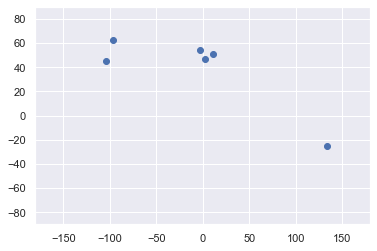

In [17]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()


# Select the features

In [19]:
x = data.iloc[:,1:3]
x

Latitude  Longitude
0     44.97    -103.77
1     62.40     -96.80
2     46.75       2.40
3     54.01      -2.53
4     51.15      10.40
5    -25.45     133.11

# Clustering

In [20]:
kmeans = KMeans(3)

In [21]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Clustering Results

In [23]:
identified_results = kmeans.fit_predict(x)
identified_results

array([0, 0, 1, 1, 1, 2])

In [24]:
data_with_clusters = data.copy()

In [26]:
data_with_clusters['Clusters'] = identified_results

In [28]:
data_with_clusters

Country  Latitude  Longitude  Language  Clusters
0        USA     44.97    -103.77         0         0
1     Canada     62.40     -96.80         0         0
2     France     46.75       2.40         1         1
3         UK     54.01      -2.53         0         1
4    Germany     51.15      10.40         2         1
5  Australia    -25.45     133.11         0         2

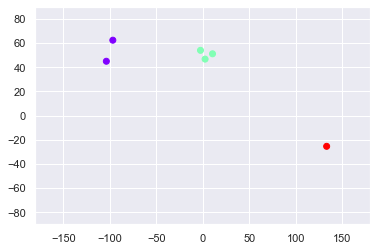

In [35]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()